# [de Boer+ 2019](https://ui.adsabs.harvard.edu/abs/2019MNRAS.485.4906D/abstract), [data](https://github.com/tdboer/GC_profiles/tree/f31e147c1ac2de11146d421f261cc620340ae9a9)

In [1]:
if "logger" in globals() and  len(logger.handlers) >= 1:
    # To suppress debug output from the logger defined in .ipython/profile_default/ipython_config.py
    logger.handlers.pop()

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import sys
import numpy
import logging
import numpy as np
import astropy.units as u
import astropy.constants as const
import astropy.coordinates as coord
import colorcet
import matplotlib
from matplotlib import pyplot
from matplotlib import pyplot as plt
pyplot.style.use("tlrh")

# This repo: src folder /w Python scripts
sys.path.append("../src")
# Other repos linked into the notebook container ;-)
sys.path.append("/supaharris")
from data.parse_deBoer_2019 import parse_deBoer_2019_fits
from data.parse_deBoer_2019 import parse_deBoer_2019_member_stars
sys.path.append("/supaharris-client")
from supaharrisclient.units import arcmin2parsec
from supaharrisclient.units import parsec2arcmin
from supaharrisclient.utils import suppress_stdout
from supaharrisclient.client import SupaHarrisClient
sys.path.append("/auriga/src")
from mw_m31_gc_observations import read_MWandM31_data
MW_h96e10, MW_v13, M31_c11, M31_cr16 = read_MWandM31_data()
sys.path.append("/limepy")
from limepy import spes
from limepy import limepy
from limepy import sample

logging.basicConfig(stream=sys.stdout, format="%(message)s")
logger = logging.getLogger(); logger.level = logging.INFO
for h in logger.handlers: h.setLevel(logger.level)

In [3]:
deBoer_fits = parse_deBoer_2019_fits(logger)

print(deBoer_fits.shape)
print(deBoer_fits.dtype)
print(deBoer_fits["id"])

(81,)
[('id', '<U12'), ('W_lime', '<f8'), ('e_W_lime', '<f8'), ('g_lime', '<f8'), ('e_g_lime', '<f8'), ('rt_lime', '<f8'), ('e_rt_lime', '<f8'), ('M_lime', '<f8'), ('e_M_lime', '<f8'), ('W_pe', '<f8'), ('e_W_pe', '<f8'), ('eta_pe', '<f8'), ('e_eta_pe', '<f8'), ('log1minB_pe', '<f8'), ('e_log1minB_pe', '<f8'), ('rt_pe', '<f8'), ('e_rt_pe', '<f8'), ('M_pe', '<f8'), ('e_M_pe', '<f8'), ('W_king', '<f8'), ('e_W_king', '<f8'), ('rt_king', '<f8'), ('e_rt_king', '<f8'), ('M_king', '<f8'), ('e_M_king', '<f8'), ('W_wil', '<f8'), ('e_W_wil', '<f8'), ('rt_wil', '<f8'), ('e_rt_wil', '<f8'), ('M_wil', '<f8'), ('e_M_wil', '<f8'), ('log_fpe', '<f8'), ('e_log_fpe', '<f8'), ('chi2_king', '<f8'), ('chi2red_king', '<f8'), ('chi2_wil', '<f8'), ('chi2red_wil', '<f8'), ('chi2_lime', '<f8'), ('chi2red_lime', '<f8'), ('chi2_pe', '<f8'), ('chi2red_pe', '<f8'), ('kingtrunc', '<f8'), ('kinghalf', '<f8'), ('wiltrunc', '<f8'), ('wilhalf', '<f8'), ('limehalf', '<f8'), ('e_limehalf', '<f8'), ('pehalf', '<f8'), ('e_pe

In [4]:
deBoer_member_stars = parse_deBoer_2019_member_stars(logger)

print(len(deBoer_member_stars))
print(deBoer_member_stars["NGC 1261"].shape)
print(deBoer_member_stars["NGC 1261"].dtype)

81
(714,)
[('ra', '<f8'), ('dec', '<f8'), ('xi_gc', '<f8'), ('xn_gc', '<f8'), ('ellrad_gc', '<f8'), ('pmra', '<f8'), ('pmra_error', '<f8'), ('pmdec', '<f8'), ('pmdec_error', '<f8'), ('parallax', '<f8'), ('parallax_error', '<f8'), ('phot_g_mean_mag', '<f8'), ('phot_g_mean_mag_error', '<f8'), ('phot_bp_mean_mag', '<f8'), ('phot_bp_mean_mag_error', '<f8'), ('phot_rp_mean_mag', '<f8'), ('phot_rp_mean_mag_error', '<f8'), ('phot_bp_rp_excess_factor', '<f8'), ('Ag', '<f8'), ('Abp', '<f8'), ('Arp', '<f8'), ('pmra_pmdec_corr', '<f8'), ('source_id', '<f8'), ('prob', '<f8')]


In [5]:
pmra = deBoer_member_stars["NGC 1261"]["pmra"]
pmdec = deBoer_member_stars["NGC 1261"]["pmdec"]
prob = deBoer_member_stars["NGC 1261"]["prob"]

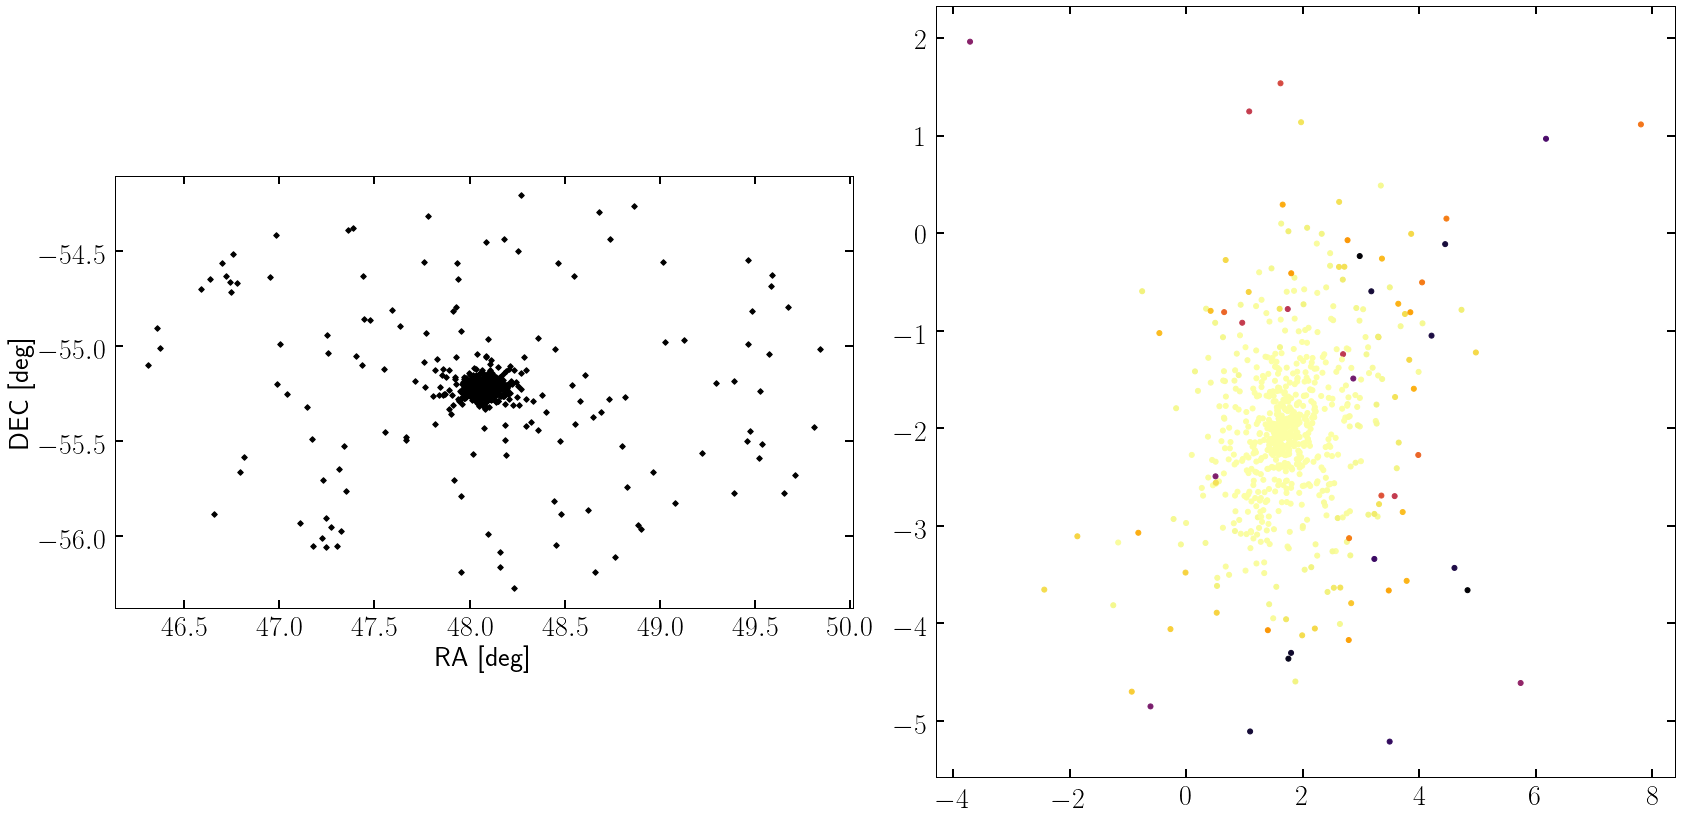

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(24, 12))

ax1.plot(deBoer_member_stars["NGC 1261"]["ra"], deBoer_member_stars["NGC 1261"]["dec"], "kD", ms=4)
ax1.set_xlabel("RA [deg]")
ax1.set_ylabel("DEC [deg]")
ax1.set_aspect(1)

pyplot.sca(ax2)
pyplot.scatter(
    deBoer_member_stars["NGC 1261"]["pmra"],
    deBoer_member_stars["NGC 1261"]["pmdec"],
    c=deBoer_member_stars["NGC 1261"]["prob"], s=25, cmap="inferno"
)
# cntr = pyplot.contour(
#     [deBoer_member_stars["NGC 1261"]["pmra"],
#     deBoer_member_stars["NGC 1261"]["pmdec"]],
#     deBoer_member_stars["NGC 1261"]["prob"],
#     colors="black", linestyles="-", levels=1
# )
# divider = make_axes_locatable(ax2)
# cax = divider.append_axes("right", size="5%", pad=0.2)
# cax = pyplot.colorbar(ax=ax2, cax=cax)
# cax.ax.set_ylabel("Memb. Prob.")
# ax2.set_xlabel("$\mu_{\\text RA}$ [mas/yr]")
# ax2.set_ylabel("$\mu_{\\text DEC}$ [mas/yr]")
# ax2.set_aspect(1)


pyplot.tight_layout()
pyplot.show(fig)

W_pe                          4.995 +/-   0.101
eta_pe                        0.232 +/-   0.006
log1minB_pe                  -2.594 +/-   0.228
B                             0.997 +/-  -0.690
rt_pe                        51.512 +/-   4.517
M_pe                       3836.790 +/-  45.379
pecore                        2.169 +/-   0.055
log_fpe                      -2.592 +/-   0.153
pehalf                        4.455 +/-   0.045
chi2_pe                     100.667
chi2red_pe                    1.480

 No G provided, set to default: G = 0.004302
 Model scaled to: G = 0.004302, M = 3836.79, rt = 51.512

 Model properties: 
 ----------------- 
 phi0 =  5.00; B = 9.974532e-01; eta = 2.3200e-01
 fpe = 2.8628e-03
 Converged = True
 M =  3.837e+03 
 U = -5.439e+03; K = 2.719e+03; p_eV_e = 7.400e-01; Q = -K/(U+3p_eV_e) = 0.500 
 rv/rh = 1.281; rh/r0 =  2.062; rt/r0 =  23.368


W_lime                        3.632 +/-   0.413
g_lime                        2.824 +/-   0.120
rt_lime                

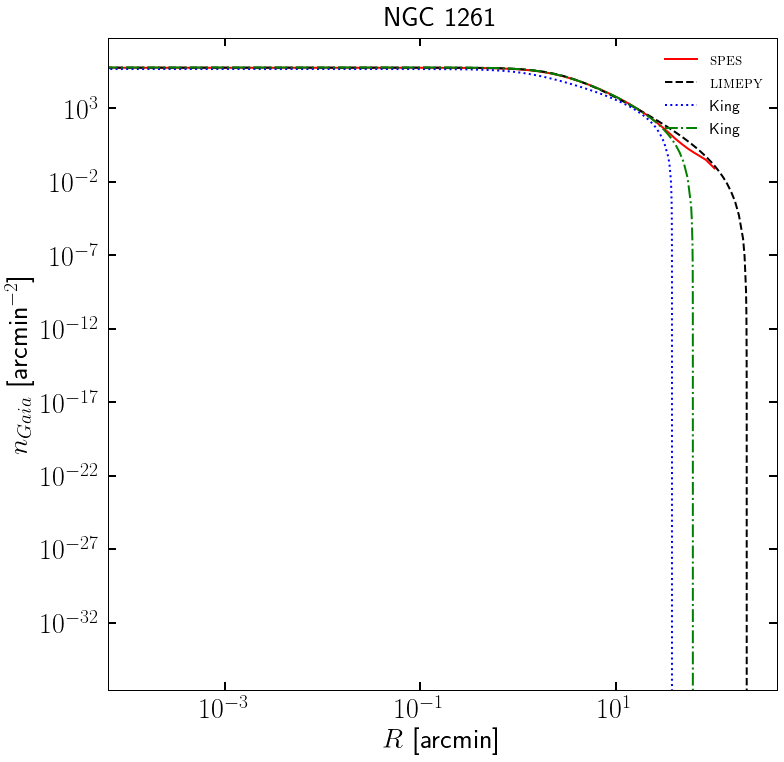

In [7]:
for i, fit in enumerate(deBoer_fits):
    if fit["id"] != "NGC 1261": continue
    fig, ax = pyplot.subplots(1, 1, figsize=(12, 12))
    
    ax.text(0.5, 1.01, fit["id"], ha="center", va="bottom", transform=ax.transAxes)


    # SPES: Spherical Potential Escapers Stitched models
    B = 1 - numpy.power(10, fit["log1minB_pe"]) 
    e_B = 1 - numpy.power(10, fit["e_log1minB_pe"]) 
    fpe = numpy.power(10, fit["log_fpe"])
    e_fpe = numpy.power(10, fit["e_log_fpe"])
    for pe_param in [
        "W_pe", "eta_pe", "log1minB_pe", "rt_pe", "M_pe", "pecore", "log_fpe", "pehalf"
    ]:
        print("{0:<20s}{1:> 15.3f} +/- {2:>7.3f}".format(
            pe_param, fit[pe_param], fit["e_"+pe_param])
        )
        if pe_param == "log1minB_pe":
            print("{0:<20s}{1:> 15.3f} +/- {2:>7.3f}".format("B", B, e_B))
    print("{0:<20s}{1:> 15.3f}".format("chi2_pe", fit["chi2_pe"]))
    print("{0:<20s}{1:> 15.3f}\n".format("chi2red_pe", fit["chi2red_pe"]))
    # W must be phi0: central dimensionless potential
    # eta: velocity dispersion of PEs in model units [0-1]
    # B: reduction of the DF at trunction [0-1]
    s = spes(fit["W_pe"], B=B, eta=fit["eta_pe"], M=fit["M_pe"], fpe=fpe, rt=fit["rt_pe"], 
        project=True, verbose=True)
    # gc_s = sample(s, N=1337)
    print("\n")
    ax.plot(s.R, s.M/0.8*s.Sigma, c="r", ls="-", lw=2, label="$\\textsc{spes}$")


    # LIMEPY: (Multi-Mass, Anisotropic) Lowered Isothermal Model Explorer in Python
    for lime_param in [
        "W_lime", "g_lime", "rt_lime", "M_lime", "limehalf"
    ]:
        print("{0:<20s}{1:> 15.3f} +/- {2:>7.3f}".format(
            lime_param, fit[lime_param], fit["e_"+lime_param])
        )
    print("{0:<20s}{1:> 15.3f}".format("chi2_lime", fit["chi2_lime"]))
    print("{0:<20s}{1:> 15.3f}\n".format("chi2red_lime", fit["chi2red_lime"]))
    # W must be phi0: central dimensionless potential
    # g: order of truncation (0<= g < 3.5; 0=Woolley, 1=King, 2=Wilson)
    l = limepy(fit["W_lime"], g=fit["g_lime"], M=fit["M_lime"], rt=fit["rt_lime"],
        project=True, verbose=True)
    # gc_l = sample(l, N=1337)
    ax.plot(l.R, l.M/0.8*l.Sigma, c="k", ls="--", lw=2, label="$\\textsc{limepy}$")
    
    
    # King (1966)
    for king_param in [
        "W_king", "rt_king", "M_king" 
    ]:
        print("{0:<20s}{1:> 15.3f} +/- {2:>7.3f}".format(
            king_param, fit[king_param], fit["e_"+king_param])
        )
    print("{0:<20s}{1:> 15.3f}".format("kinghalf", fit["kinghalf"]))
    print("{0:<20s}{1:> 15.3f}".format("kingtrunc", fit["kingtrunc"]))
    print("{0:<20s}{1:> 15.3f}".format("chi2_king", fit["chi2_king"]))
    print("{0:<20s}{1:> 15.3f}\n".format("chi2red_king", fit["chi2red_king"]))
    # W must be phi0: central dimensionless potential
    # g: Order of truncation (0<= g < 3.5; 0=Woolley, 1=King, 2=Wilson)
    k = limepy(fit["W_king"], g=1, M=fit["M_king"], rt=fit["rt_king"],
        project=True, verbose=True)
    # gc_l = sample(l, N=1337)
    ax.plot(k.R, k.M/0.8*k.Sigma, c="b", ls=":", lw=2, label="King")
   

    # Wilson
    for wilson_param in [
        "W_wil", "rt_wil", "M_wil" 
    ]:
        print("{0:<20s}{1:> 15.3f} +/- {2:>7.3f}".format(
            wilson_param, fit[wilson_param], fit["e_"+wilson_param])
        )
    print("{0:<20s}{1:> 15.3f}".format("wilhalf", fit["wilhalf"]))
    print("{0:<20s}{1:> 15.3f}".format("wiltrunc", fit["wiltrunc"]))
    print("{0:<20s}{1:> 15.3f}".format("chi2_wil", fit["chi2_wil"]))
    print("{0:<20s}{1:> 15.3f}\n".format("chi2red_wil", fit["chi2red_wil"]))
    # W must be phi0: central dimensionless potential
    # g: Order of truncation (0<= g < 3.5; 0=Woolley, 1=King, 2=Wilson)
    w = limepy(fit["W_wil"], g=2, M=fit["M_wil"], rt=fit["rt_wil"],
        project=True, verbose=True)
    # gc_l = sample(l, N=1337)
    ax.plot(w.R, w.M/0.8*w.Sigma, c="g", ls="-.", lw=2, label="King")
    
    # ax.set_xlim(5e-3, 100)
    # ax.set_ylim(1e-3, 6e3)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("$R$ [arcmin]")
    ax.set_ylabel("$n_{Gaia}$ [arcmin$^{-2}$]")
    ax.legend(fontsize=16, loc="upper right", frameon=False)

    pyplot.show(fig)
    
    if i >= 0: break